01_Morning.jpg: 225752 px^2 of leaf area
02_Morning.jpg: 250710 px^2 of leaf area
03_Morning.jpg: 233743 px^2 of leaf area
04_Morning.jpg: 327417 px^2 of leaf area
05_Morning.jpg: 417475 px^2 of leaf area
06_Morning.jpg: 491792 px^2 of leaf area
07_Morning.jpg: 568483 px^2 of leaf area
08_Morning.jpg: 697760 px^2 of leaf area
09_Morning.jpg: 633211 px^2 of leaf area
10_Morning.jpg: 629174 px^2 of leaf area
11_Morning.jpg: 752985 px^2 of leaf area
12_Morning.jpg: 791607 px^2 of leaf area


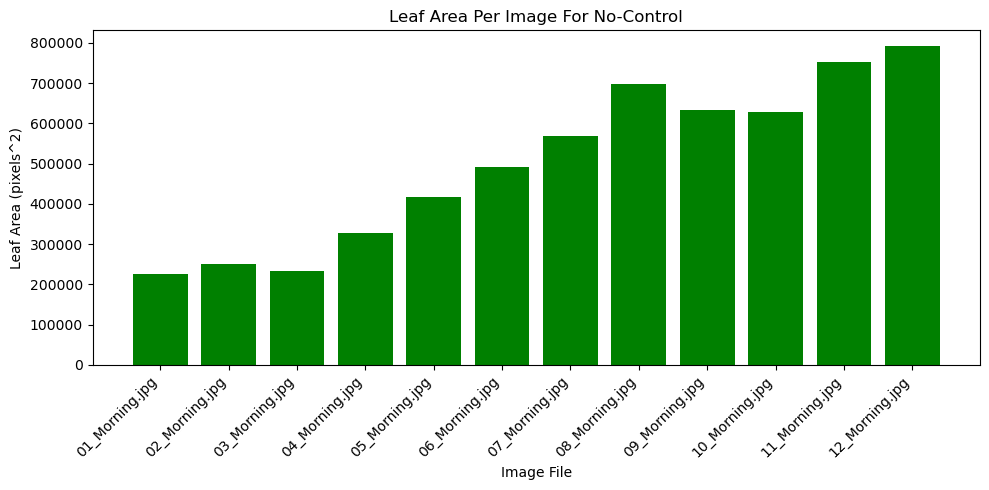

Leaf area measurement complete. Results saved.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


folder_path = "PlantSelected/NoControls"


image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

def measure_leaf_area(image_path):
    """
    Measure total green leaf area in an image using HSV segmentation and contour analysis.
    """
    
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Could not read image: {image_path}")
        return 0
    
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    
    
    lower_green = np.array([30, 40, 40])  # Lowering hue, saturation, and value
    upper_green = np.array([90, 255, 255])  # Raising hue to capture more green shades
    
    
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    
    small_kernel = np.ones((3, 3), np.uint8)  # Used for opening
    large_kernel = np.ones((5, 5), np.uint8)  # Used for closing

    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, small_kernel, iterations=2)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, large_kernel, iterations=3)
    
    
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    min_contour_area = 1490
    leaf_area = 0
    result_img = image.copy()
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_contour_area:
            leaf_area += area
            cv2.drawContours(result_img, [contour], -1, (0, 255, 0), 2)
    
    
    cv2.putText(result_img, f'Leaf area: {int(leaf_area)} px^2', 
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    
    result_filename = "area_result_" + os.path.basename(image_path)
    cv2.imwrite(result_filename, result_img)
    
    return int(leaf_area)


leaf_areas = {}
for image_file in image_files:
    full_path = os.path.join(folder_path, image_file)
    leaf_areas[image_file] = measure_leaf_area(full_path)
    print(f"{image_file}: {leaf_areas[image_file]} px^2 of leaf area")


plt.figure(figsize=(10, 5))
plt.bar(leaf_areas.keys(), leaf_areas.values(), color='green')
plt.xlabel("Image File")
plt.ylabel("Leaf Area (pixels^2)")
plt.title("Leaf Area Per Image For No-Control")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('leaf_area_graph.png')
plt.show()

print("Leaf area measurement complete. Results saved.")

01_Morning.jpg: 258339 px^2 of leaf area
02_Morning.jpg: 233711 px^2 of leaf area
03_Morning.jpg: 249267 px^2 of leaf area
04_Morning.jpg: 235374 px^2 of leaf area
05_Morning.jpg: 308651 px^2 of leaf area
06_Morning.jpg: 243846 px^2 of leaf area
07_Morning.jpg: 402929 px^2 of leaf area
08_Morning.jpg: 333383 px^2 of leaf area
09_Morning.jpg: 347944 px^2 of leaf area
10_Morning.jpg: 250192 px^2 of leaf area
11_Morning.jpg: 339770 px^2 of leaf area
12_Morning.jpg: 336339 px^2 of leaf area


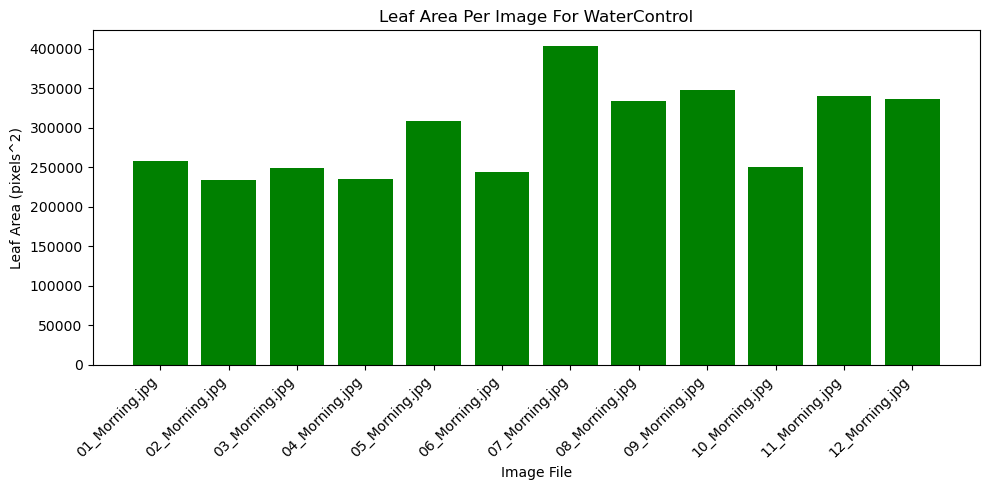

Leaf area measurement complete. Results saved.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


folder_path = "PlantSelected/WaterControls"


image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

def measure_leaf_area(image_path):
    """
    Measure total green leaf area in an image using HSV segmentation and contour analysis.
    """
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Could not read image: {image_path}")
        return 0
    
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    
    lower_green = np.array([35, 50, 50])  
    upper_green = np.array([85, 255, 255])

 
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    
    small_kernel = np.ones((3, 3), np.uint8)  
    large_kernel = np.ones((5, 5), np.uint8)

    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, small_kernel, iterations=1)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, large_kernel, iterations=2)
    
    
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    min_contour_area = 500  
    leaf_area = 0
    result_img = image.copy()
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_contour_area:
            leaf_area += area
            cv2.drawContours(result_img, [contour], -1, (0, 255, 0), 2)
    
    
    cv2.putText(result_img, f'Leaf area: {int(leaf_area)} px^2', 
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    
    result_filename = "area_result_" + os.path.basename(image_path)
    cv2.imwrite(result_filename, result_img)
    
    return int(leaf_area)


leaf_areas = {}
for image_file in image_files:
    full_path = os.path.join(folder_path, image_file)
    leaf_areas[image_file] = measure_leaf_area(full_path)
    print(f"{image_file}: {leaf_areas[image_file]} px^2 of leaf area")


plt.figure(figsize=(10, 5))
plt.bar(leaf_areas.keys(), leaf_areas.values(), color='green')
plt.xlabel("Image File")
plt.ylabel("Leaf Area (pixels^2)")
plt.title("Leaf Area Per Image For WaterControl")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('leaf_area_graph.png')
plt.show()

print("Leaf area measurement complete. Results saved.")